<a href="https://colab.research.google.com/github/ABDESSAMADHAKAM/Face_Mask_Detection/blob/main/Facemaskdetection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [22]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D,MaxPooling2D,Dropout,Flatten,Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import numpy as np
import matplotlib.pyplot as plt

In [2]:
import os
os.environ['KAGGLE_USERNAME']='abdessamadhakam'
os.environ['KAGGLE_KEY']='8dadbb65df072096fc8d5a9fb604ff48'

In [3]:
!kaggle datasets download -d prithwirajmitra/covid-face-mask-detection-dataset

 97% 201M/207M [00:02<00:00, 113MB/s] 
100% 207M/207M [00:02<00:00, 103MB/s]


In [4]:
!unzip covid-face-mask-detection-dataset.zip

Archive:  covid-face-mask-detection-dataset.zip
  inflating: New Masks Dataset/Test/Mask/2070.jpg  
  inflating: New Masks Dataset/Test/Mask/2072.jpg  
  inflating: New Masks Dataset/Test/Mask/2083.jpg  
  inflating: New Masks Dataset/Test/Mask/2085.jpg  
  inflating: New Masks Dataset/Test/Mask/2086.jpg  
  inflating: New Masks Dataset/Test/Mask/2110.jpg  
  inflating: New Masks Dataset/Test/Mask/2113.jpg  
  inflating: New Masks Dataset/Test/Mask/2114.jpeg  
  inflating: New Masks Dataset/Test/Mask/2130.jpg  
  inflating: New Masks Dataset/Test/Mask/2132.jpg  
  inflating: New Masks Dataset/Test/Mask/2135.jpg  
  inflating: New Masks Dataset/Test/Mask/2154.png  
  inflating: New Masks Dataset/Test/Mask/2158.png  
  inflating: New Masks Dataset/Test/Mask/2159.png  
  inflating: New Masks Dataset/Test/Mask/2160.png  
  inflating: New Masks Dataset/Test/Mask/2170.png  
  inflating: New Masks Dataset/Test/Mask/2172.png  
  inflating: New Masks Dataset/Test/Mask/2173.png  
  inflating: Ne

In [5]:
main_dir= '/content/New Masks Dataset'
train_dir=os.path.join(main_dir,'Train')
test_dir=os.path.join(main_dir,'Test')
val_dir=os.path.join(main_dir,'Validation')
train_mask_dir=os.path.join(train_dir,'Mask')
train_nomask_dir=os.path.join(train_dir,'Non Mask')

In [7]:
train_mask_names= os.listdir(train_mask_dir)
print(train_mask_names[:10])
train_nomask_names= os.listdir(train_nomask_dir)
print(train_nomask_names[:10])

['0891.jpg', '0769.jpg', '1154.jpg', '1583.jpg', '0018.jpg', '1103.png', '0763.jpg', '0201.jpg', '1608.jpeg', '0482.jpg']
['330.jpg', '89.jpg', '216.jpg', '2.jpg', '124.jpg', '310.jpg', '344.jpg', '287.jpg', '149.jpg', '52.jpg']


['/content/New Masks Dataset/Train/Mask/0891.jpg', '/content/New Masks Dataset/Train/Mask/0769.jpg', '/content/New Masks Dataset/Train/Mask/1154.jpg', '/content/New Masks Dataset/Train/Mask/1583.jpg', '/content/New Masks Dataset/Train/Mask/0018.jpg', '/content/New Masks Dataset/Train/Mask/1103.png', '/content/New Masks Dataset/Train/Mask/0763.jpg', '/content/New Masks Dataset/Train/Mask/0201.jpg']
['/content/New Masks Dataset/Train/Non Mask/330.jpg', '/content/New Masks Dataset/Train/Non Mask/89.jpg', '/content/New Masks Dataset/Train/Non Mask/216.jpg', '/content/New Masks Dataset/Train/Non Mask/2.jpg', '/content/New Masks Dataset/Train/Non Mask/124.jpg', '/content/New Masks Dataset/Train/Non Mask/310.jpg', '/content/New Masks Dataset/Train/Non Mask/344.jpg', '/content/New Masks Dataset/Train/Non Mask/287.jpg']


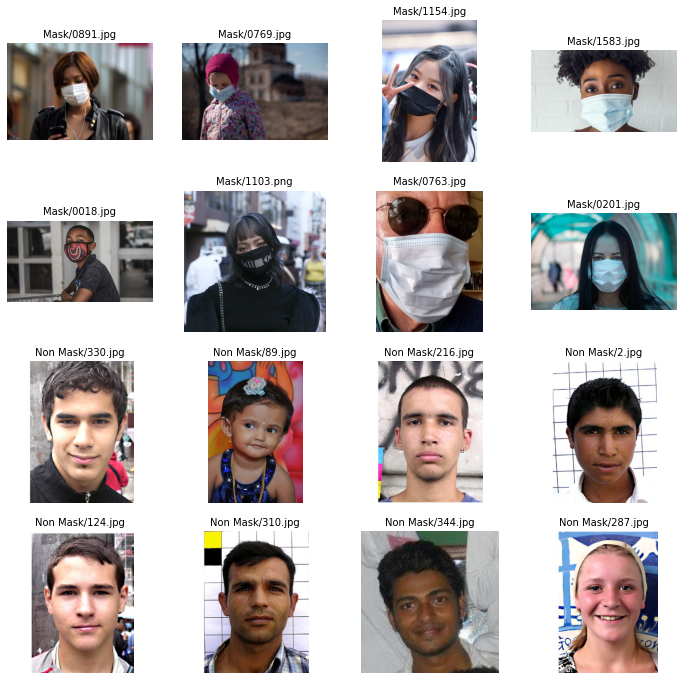

In [16]:
import matplotlib.image as npimg
nrows=4
ncols=4
plt.figure(figsize=(12,12))
mask_pic=[]
for i in train_mask_names[0:8]:
  mask_pic.append(os.path.join(train_mask_dir,i))
nomask_pic=[]
for i in train_nomask_names[0:8]:
  nomask_pic.append(os.path.join(train_nomask_dir,i))
print(mask_pic)
print(nomask_pic)
merged_list=mask_pic+nomask_pic
for i in range(0,len(merged_list)):
  data = merged_list[i].split('/',4)[4]
  sp=plt.subplot(nrows,ncols,i+1)
  sp.axis('Off')
  image=npimg.imread(merged_list[i])
  sp.set_title(data,fontsize=10)
  plt.imshow(image,cmap='gray')
plt.show()

In [17]:
train_datagen=ImageDataGenerator(rescale=1./255,zoom_range=0.2,rotation_range=40,horizontal_flip=True)
test_datagen=ImageDataGenerator(rescale=1./255)
val_datagen=ImageDataGenerator(rescale=1./255)
train_generator= train_datagen.flow_from_directory(train_dir,target_size=(150,150),batch_size=32,class_mode='binary')
test_generator= test_datagen.flow_from_directory(test_dir,target_size=(150,150),batch_size=32,class_mode='binary')
val_generator= val_datagen.flow_from_directory(val_dir,target_size=(150,150),batch_size=32,class_mode='binary')

Found 600 images belonging to 2 classes.
Found 100 images belonging to 2 classes.
Found 306 images belonging to 2 classes.


In [18]:
train_generator.class_indices

{'Mask': 0, 'Non Mask': 1}

In [19]:
train_generator.image_shape

(150, 150, 3)

In [23]:
model=Sequential()
model.add(Conv2D(32,(3,3),padding='SAME',activation='relu',input_shape=(150,150,3)))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.5))
model.add(Conv2D(64,(3,3),padding='SAME',activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.5))
model.add(Flatten())
model.add(Dense(256,activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1,activation='sigmoid'))
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 150, 150, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 75, 75, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 75, 75, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 75, 75, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 37, 37, 64)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 37, 37, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 87616)            

In [24]:
model.compile(Adam(lr=0.001),loss='binary_crossentropy',metrics=['accuracy'])

In [25]:
history=model.fit(train_generator,epochs=30,validation_data=val_generator)

Epoch 1/30
19/19 [==============================] - 19s 632ms/step - loss: 5.6537 - accuracy: 0.4918 - val_loss: 0.6933 - val_accuracy: 0.5000
Epoch 2/30
19/19 [==============================] - 11s 612ms/step - loss: 0.6761 - accuracy: 0.5366 - val_loss: 0.6863 - val_accuracy: 0.4935
Epoch 3/30
19/19 [==============================] - 11s 618ms/step - loss: 0.5607 - accuracy: 0.7822 - val_loss: 0.4537 - val_accuracy: 0.8856
Epoch 4/30
19/19 [==============================] - 11s 615ms/step - loss: 0.3703 - accuracy: 0.8718 - val_loss: 0.3179 - val_accuracy: 0.9020
Epoch 5/30
19/19 [==============================] - 11s 606ms/step - loss: 0.2771 - accuracy: 0.8795 - val_loss: 0.3464 - val_accuracy: 0.8922
Epoch 6/30
19/19 [==============================] - 11s 611ms/step - loss: 0.3057 - accuracy: 0.8889 - val_loss: 0.3139 - val_accuracy: 0.9020
Epoch 7/30
19/19 [==============================] - 11s 615ms/step - loss: 0.3044 - accuracy: 0.8894 - val_loss: 0.3241 - val_accuracy: 0.9085

Text(0.5, 0, 'epoch')

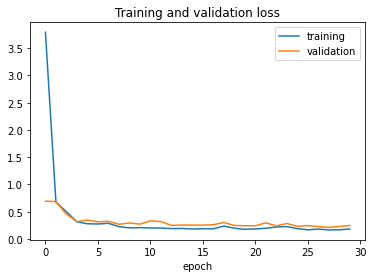

In [26]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['training','validation'])
plt.title('Training and validation loss')
plt.xlabel('epoch')

Text(0.5, 0, 'epoch')

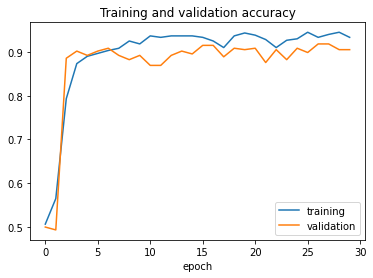

In [27]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['training','validation'])
plt.title('Training and validation accuracy')
plt.xlabel('epoch')

In [29]:
test_loss, test_acc=model.evaluate(test_generator)
print('test_loss:{} test_acc:{}'.format(test_loss,test_acc))

4/4 [==============================] - 1s 217ms/step - loss: 0.2071 - accuracy: 0.9000
test_loss:0.20710797607898712 test_acc:0.8999999761581421


In [30]:
from google.colab import files
from keras.preprocessing import image
uploaded=files.upload()
for fname in uploaded.keys():
  img_path='/content/'+fname
  img=image.load_img(img_path,target_size=(150,150))
  images=image.img_to_array(img)
  images=np.expand_dims(images,axis=0)
  prediction=model.predict(images)
  print(fname)
  if prediction==0:
    print('mask')
  else:
    print('nomask')

Saving mask.jpg to mask.jpg
Saving nomask.png to nomask.png
mask.jpg
mask
nomask.png
nomask


In [31]:
model.save('model.h5')